## E-commerce Customer Dataset

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("Ecommerce_Customers.csv")
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

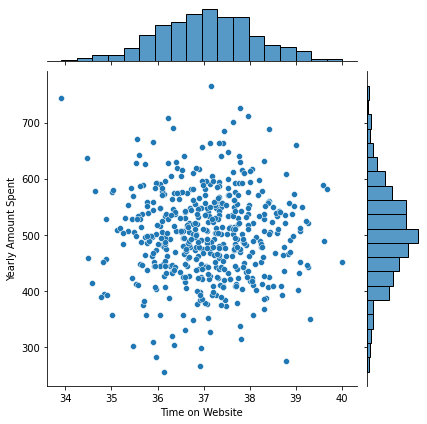

In [5]:
## COMPARING TIME ON WEBSITE VS YEARLY AMOUNT
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')


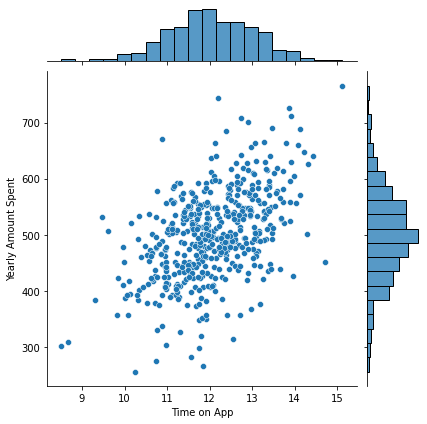

In [6]:
## COMPARING TIME ON APP VS YEARLY AMOUNT
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent')

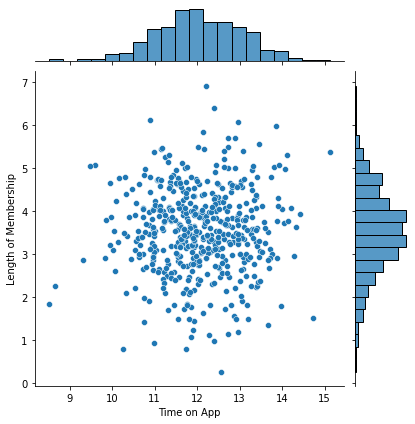

In [6]:
## TIME ON APP VS LENGTH OF MEMBERSHIP
sns.jointplot(data=df,x='Time on App',y='Length of Membership')


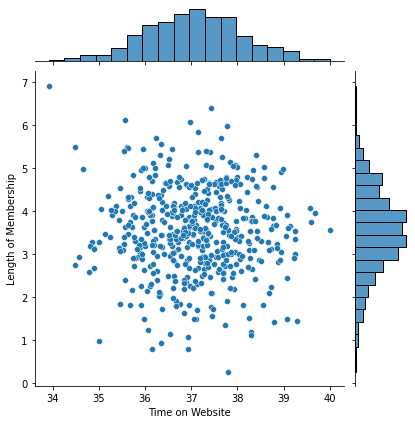

In [9]:
## TIME ON WEBSITE VS LENGTH OF MEMBERSHIP
sns.jointplot(data=df,x='Time on Website',y='Length of Membership')

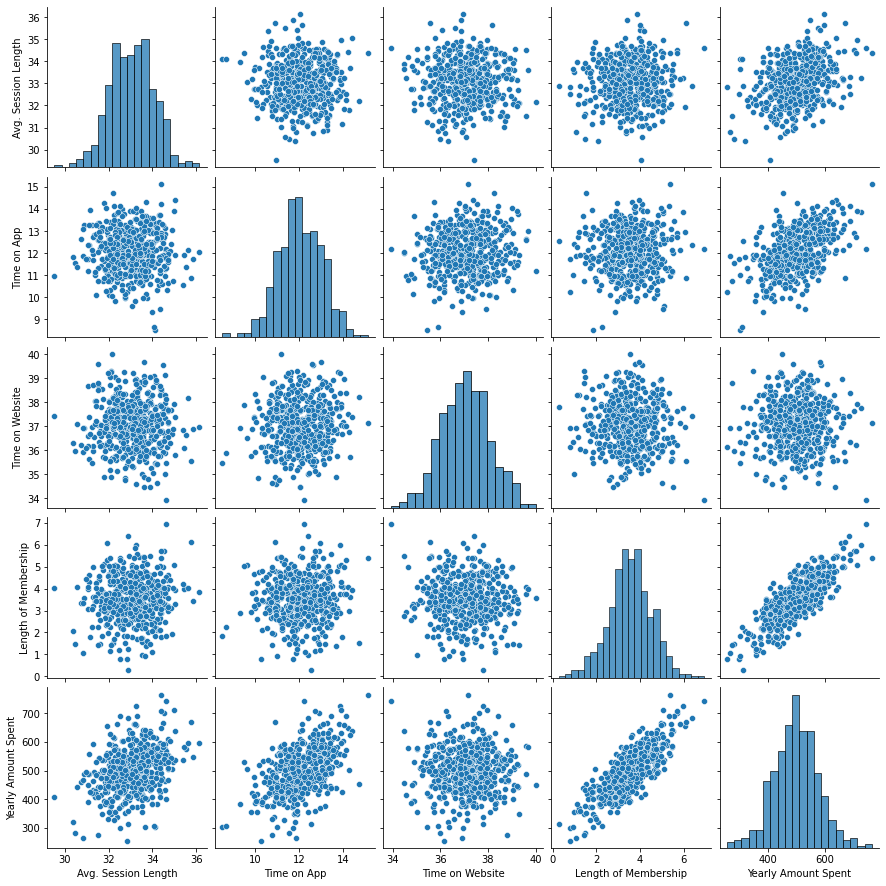

In [11]:
##VISUALIZING ON A WHOLE PAIRWISE
sns.pairplot(df)

 #### THIS SHOWS THAT THE LENGTH OF MEMBERSHIP IS COREELATED WITH THE YEARLY AMOUNT SPENT, SO WE CAN DRAW INSIGHTS BETWEEN THESE TWO WITH LINEAR REGRESSION

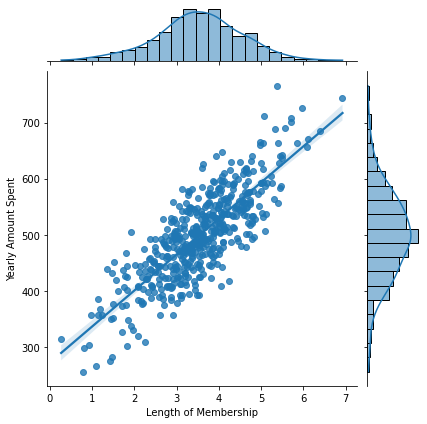

In [13]:
sns.jointplot(data=df,x='Length of Membership',y='Yearly Amount Spent',kind='reg')

#### NOW WE ARE TRYING TO ESTIMATE THE YEARLY AMOUNT SPENT BASED ON ALL THE NUMERICAL VARIABLES WE HAVE IN OUR DATASET

In [68]:
x=df[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

## IMPORTING A LINEAR REGRESSOR AND DOING TEST TRAIN SPLIT

In [81]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

### TRAINING THE MODEL USING TRAINING DATA


In [82]:
model.fit(x_train,y_train)

LinearRegression()

### PREDICTING THE OUTCOMES FROM THE TRAINED MODEL USING THE TEST DATA

In [83]:
##PREDICTIONS
prediction=model.predict(x_test)
prediction

array([391.79006672, 766.34621884, 483.23043027, 591.49339738,
       568.89675579, 447.98267034, 398.87183151, 339.76850075,
       544.57332812, 596.96444483, 475.00758873, 598.17550927,
       450.80605721, 472.78613431, 418.11493389, 480.92861745,
       409.03685835, 551.56872092, 451.86884684, 408.55926165,
       503.86707172, 501.6660992 , 504.88537625, 486.01669777,
       604.44776378, 563.20116251, 516.89784173, 500.36878202,
       422.64002456, 554.23660524, 572.31571691, 522.72208823,
       342.55086639, 547.79228207, 525.68059397, 473.82061113,
       419.56831236, 429.60602424, 491.23580422, 657.23897171,
       552.86607137, 435.55277167, 549.06279027, 457.34908674,
       306.07489946, 478.13350806, 411.61045768, 564.97889688,
       489.14545093, 558.15181167, 394.95524423, 445.3779503 ,
       370.48733061, 408.30274403, 444.44760473, 627.89084321,
       430.8063881 , 432.54403217, 254.68592092, 552.54654427,
       354.95533756, 601.38660512, 552.76206365, 519.50

### VISUALIZING THE REAL VALUES VS PREDICTED VALUES

Text(0.5, 0, 'Y_test(Actual Values)')

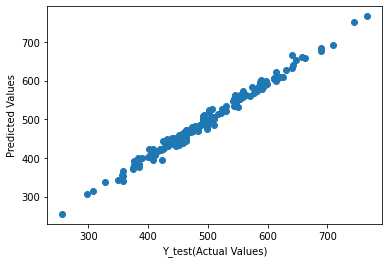

In [90]:
plt.scatter(y_test,prediction)
plt.ylabel('Predicted Values')
plt.xlabel('Y_test(Actual Values)')

### EAVLUATING OUR MODEL MATHEMATICALLY USING PERFORMANCE METRICS FOR LINEAR REGRESSION

#### PERFORMANCE METRICS FOR LINEAR REGRESSION
1) MEAN ABSOLUTE ERROR

2) MEAN SQUARED ERROR

3) ROOT MEAN SQUARED ERROR


In [91]:
from sklearn import metrics
mae=metrics.mean_absolute_error(prediction,y_test)
mse=metrics.mean_squared_error(prediction,y_test)
rmse=np.sqrt(metrics.mean_squared_error(prediction,y_test))
r_sq=metrics.r2_score(prediction,y_test)
print("The MEAN ABSOLUTE ERROR is    ",mae)
print("The MEAN SQUARED ERROR is     ",mse)
print("The ROOT MEAN SQUARED ERROR is",rmse)
print("The R-SQUARED value is        ",r_sq)

The MEAN ABSOLUTE ERROR is     7.7106475913811074
The MEAN SQUARED ERROR is      97.60469300508474
The ROOT MEAN SQUARED ERROR is 9.879508743104829
The R-SQUARED value is         0.9872614111950799


### ANALYSING RESIDUES

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

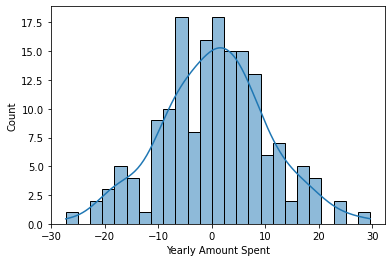

In [97]:
sns.histplot((y_test-prediction),bins=25,kde=True)

### DRAWING CONCLUSIONS ON THE DATA


In [99]:
cdf=pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
cdf

Coefficient
Avg. Session Length     25.746490
Time on App             39.030528
Time on Website          0.452109
Length of Membership    61.360264

In [100]:
acc=model.score(x_test,y_test)
print("THE ACCURACY OF THE MODEL IS:",acc*100)

THE ACCURACY OF THE MODEL IS: 98.74367026682481


## CONCLUSIONS
### 1) PEOPLE ARE USING THE APP VERSION RATHER THAN THE WEBSITE.
### 2) COMPANY MUST FOCUS MORE ON DEVELPOING THE WEBSITE BEACUSE, ITS VIEW RATE IS LESS COMPARED TO APP.
### 3) IN OTHER WAY COMPANY CAN FOCUS ON INCORPORATING MORE FEATURES IN THE APP, BECAUSE IT'S GOT MORE BUSINESS THERE
### 4) PEOPLE WITH MORE LENGTH OF MEMBERSHIP TEND TO PURCHASE MORE PRODUCTS FROM THE COMPANY, SO IT'S BETTER TO MAKE THE CUSTOMER EXTEND THEIR MEMBERSHIP FOR A MORE PERIOD OF TIME INORDER TO MAKE MORE BUSINESS.